# A (Very) Basic Introduction to Graph Learning

2021-01-XX

Giovanni d'Ario

In [4]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx
from networkx.utils import pairwise

def hide_code_in_slideshow():   
    from IPython import display
    import binascii
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()    
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;
            while (!p.hasClass("cell")) {
                p=p.parent();
                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=True)
    
def multilayered_graph(*subset_sizes):
    extents = pairwise(itertools.accumulate((0,) + subset_sizes))
    layers = [range(start, end) for start, end in extents]
    G = nx.Graph()
    for (i, layer) in enumerate(layers):
        G.add_nodes_from(layer, layer=i)
    for layer1, layer2 in pairwise(layers):
        G.add_edges_from(itertools.product(layer1, layer2))
    return G

# Contents

- Basic definitions
- PUT HERE AN INTRO TO THE BASIC IDEAS OF MESSAGE PASSING
- Bronstein’s “Deep Learning on Graphs: successes, challenges etc”
- Bronstein’s Expressive power of GNNs

# Basic Definitions

- Examples of graphs
    - Zachary’s Karate club
    - Twitter, the internet etc.
    - recommender systems
    - molecular pathways
    - chemical structures
- Definition of graphs: nodes, edges, directed vs undirected. Simple vs non-simple.
- Adjacency matrix for
    - Undirected matrices (symmetric)
    - Directed matrices (non symmetric)
    - Weighted edges

# Multi-Relational Graphs

- Graphs with different types of edges
- Example: drug-drug interaction. Different edges correspond to different side effects (PUT IMAGE FROM DECAGON HERE)
- One adjacency matrix per edge type -> adjacency tensor

# Multi-Relational Graphs: Special Cases

## Heterogeneous Graphs

- Nodes can also have *types*
- Nodes can be partitioned into disjoint sets $\mathcal{V_1},\mathcal{V_2}, \ldots, \mathcal{V_k}$
- $\mathcal{V} = \mathcal{V_1} \cup \mathcal{V_2} \cup \ldots \cup \mathcal{V_k}$
- $\mathcal{V_i} \cap \mathcal{V_j} = \emptyset,\quad \forall i \neq j$
- Possible constraints: nodes of one type interact with nodes of other types
- Example: molecules targeting proteins

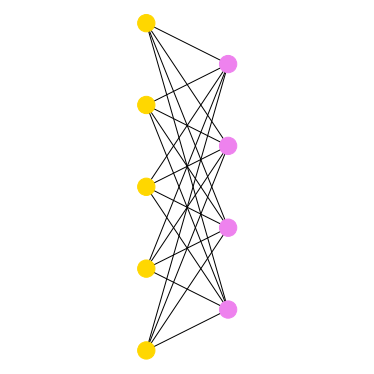

In [5]:
hide_code_in_slideshow()
subset_sizes = [5, 4]
subset_color = ["gold", "violet"]
G = multilayered_graph(*subset_sizes)
color = [subset_color[data["layer"]] for v, data in G.nodes(data=True)]
pos = nx.multipartite_layout(G, subset_key="layer")
plt.figure(figsize=(5, 5))
nx.draw(G, pos, node_color=color, with_labels=False)
plt.axis("equal")
plt.show()

# Multi-Relational Graphs: Special Cases

- a) Multilayer network: each layer contains its own network
- b) Multiplex netork are a special case of multilayer network, where nodes represent the same entities in each layer

![](fig/multilayerplex.png)

## Machine Learning Goals on Graphs

PUT HERE EXAMPLES OF

1. Node classification
2. Relation prediction
3. Clustering and community detection
4. Graph classification, regression and clustering